In [2]:
import pandas as pd

data = pd.read_csv("train 1.csv")

In [3]:
data

,date,store,item,sales
0,1/1/2013,1,1,13
1,1/2/2013,1,1,11
2,1/3/2013,1,1,14
3,1/4/2013,1,1,13
4,1/5/2013,1,1,10
...,...,...,...,...
912995,12/27/2017,10,50,63
912996,12/28/2017,10,50,59
912997,12/29/2017,10,50,74
912998,12/30/2017,10,50,62


In [4]:
data.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [8]:
data["date"] = data["date"].astype("datetime64[ns]")

#datetime64[ns] is the datatype that represents date
#date can be grouped yearly, quarterly, monthly or daily
#the astype is used to convert from one datatype to another


In [9]:
data.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [10]:
data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [14]:
#we use the dt on a datetime/period column
# Y means yearly, M meanns monthly, Q means qurterly and D means daily

a = data["date"].dt.to_period("Y")

data.insert(1, "Yearly sales", a)

In [15]:
data

,date,Yearly sales,store,item,sales
0,2013-01-01,2013,1,1,13
1,2013-01-02,2013,1,1,11
2,2013-01-03,2013,1,1,14
3,2013-01-04,2013,1,1,13
4,2013-01-05,2013,1,1,10
...,...,...,...,...,...
912995,2017-12-27,2017,10,50,63
912996,2017-12-28,2017,10,50,59
912997,2017-12-29,2017,10,50,74
912998,2017-12-30,2017,10,50,62


In [19]:
data.groupby("Yearly sales").sum("numeric_only")

#grouping a column and summarizing the values for that column

,store,item,sales
Yearly sales,,,
2013,1003750,4653750,7941243
2014,1003750,4653750,9135482
2015,1003750,4653750,9536887
2016,1006500,4666500,10357160
2017,1003750,4653750,10733740


In [21]:
data.groupby("Yearly sales").sum()[["item", "sales"]]

#selecting 2 columns only after grouping

,item,sales
Yearly sales,,
2013,4653750,7941243
2014,4653750,9135482
2015,4653750,9536887
2016,4666500,10357160
2017,4653750,10733740


In [27]:
data.groupby("Yearly sales").sum()[["item", "sales"]].nlargest(5, "sales")

#nlargest is used to extract the largest value in a column
#it takes in the number of rows, then the column name

,item,sales
Yearly sales,,
2017,4653750,10733740
2016,4666500,10357160
2015,4653750,9536887
2014,4653750,9135482
2013,4653750,7941243


In [30]:
summary = data.groupby("Yearly sales").sum()[["item", "sales"]].nsmallest(5, "sales")

# visualizing the data

In [35]:
summary = summary.reset_index()

#reset_index() is used to reset the index back to 0, instead of using the "Yearly sales"

In [36]:
summary

,Yearly sales,item,sales
0,2013,4653750,7941243
1,2014,4653750,9135482
2,2015,4653750,9536887
3,2016,4666500,10357160
4,2017,4653750,10733740


In [37]:
summary.dtypes

Yearly sales    period[A-DEC]
item                    int64
sales                   int64
dtype: object

# before plotting we need to convert the period back to datetime

In [40]:
summary["Yearly sales"].dt.to_timestamp()

#timestamp() is used to convert a period back to datetime

0   2013-01-01
1   2014-01-01
2   2015-01-01
3   2016-01-01
4   2017-01-01
Name: Yearly sales, dtype: datetime64[ns]

In [41]:
summary["Yearly sales"] = summary["Yearly sales"].dt.to_timestamp()

In [42]:
summary

,Yearly sales,item,sales
0,2013-01-01,4653750,7941243
1,2014-01-01,4653750,9135482
2,2015-01-01,4653750,9536887
3,2016-01-01,4666500,10357160
4,2017-01-01,4653750,10733740


In [43]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Yearly sales'>

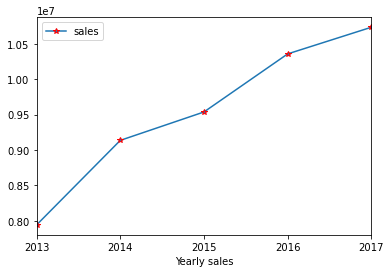

In [47]:
summary.plot(kind="line", x="Yearly sales", y="sales", marker="*", mec="red")

#marker edge color (mec)

In [ ]:
# assignment